In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.tsa.stattools as st
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


# 假设data是时间序列数据
data1 = pd.read_excel("C:\\Users\\蒋婧雯\\Desktop\\jjw.xlsx",header=0)
# data=data1["x"]

In [2]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 假设df是一个包含历史高考人数数据的DataFrame，其中包含一列名为'Enrollment'的时间序列数据
# df = pd.read_csv('historical_enrollment_data.csv')

# 数据预处理（例如，转换为时间序列格式）
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# 检验时间序列的平稳性
# from statsmodels.tsa.stattools import adfuller
# result = adfuller(df['Enrollment'])
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])

# 如果需要，对数据进行差分使其平稳
# df['Enrollment_diff'] = df['Enrollment'].diff().dropna()

# 拟合ARMA模型
# model = ARIMA(df['Enrollment'], order=(p, d, q))  # p, d, q为模型参数，需要根据数据选择合适的值
# model_fit = model.fit()

# 进行预测
# forecast = model_fit.forecast(steps=n)  # n为预测的步数

# 可视化预测结果
# plt.plot(df['Enrollment'], label='Historical')
# plt.plot(pd.date_range(df.index[-1], periods=n, freq='M'), forecast, label='Forecast')
# plt.legend()
# plt.show()


In [3]:
data=data1['居民消费价格指数(上年同月＝100)']

In [4]:
data

0     104.47
1     103.55
2     103.25
3     102.38
4     101.86
5     101.44
6     100.73
7     100.89
8     101.00
9     100.90
10    100.20
11    100.20
12     99.20
13     99.90
14    100.60
15    101.10
16    101.20
17    100.90
18    101.50
19    101.40
20    101.20
21    102.00
22    102.40
23    101.80
24    101.30
25    101.20
26    101.80
27    102.00
28    102.20
29    102.50
30    102.10
31    101.90
32    102.10
33    101.30
34    101.20
35    101.80
36    102.00
37    101.20
38    100.70
39    100.30
40    100.20
41    100.10
42    100.10
43    100.30
44    100.40
45    100.00
46     99.70
47     99.50
48     99.60
Name: 居民消费价格指数(上年同月＝100), dtype: float64

In [5]:
# data= pd.to_datetime(data)
# data1.set_index('居民消费价格指数（上年＝100）', inplace=True)

# # 数据预处理

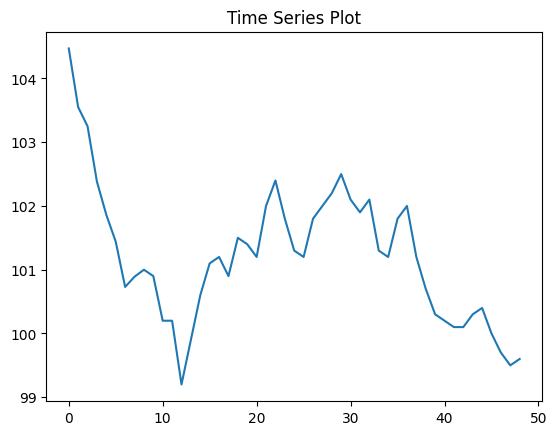

In [6]:
# 转换为pandas的Series对象
series = pd.Series(data)

# 绘制时序图
# plt.figure(figsize=(8, 4))
plt.plot(series)
plt.title('Time Series Plot')
plt.show()

In [7]:
series = pd.Series(data)

In [8]:
# 平稳性分析
from statsmodels.tsa.stattools import adfuller
result = adfuller(series )
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# 结果大于0.05，说明是非平稳的

ADF Statistic: -2.920274
p-value: 0.043041


In [9]:
#判断纯随机性

from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(data,lags=None,boxpierce=False))

     lb_stat     lb_pvalue
1  32.094771  1.468320e-08
2  49.899855  1.460106e-11
3  58.449938  1.259904e-12
4  62.578098  8.325186e-13
5  64.533557  1.400367e-12
6  65.251604  3.832599e-12
7  65.417437  1.239614e-11
8  65.634987  3.613905e-11
9  68.352636  3.200537e-11


In [10]:
# 计算样本自相关系数
result=sm.tsa.stattools.acf(data.values,nlags=72,adjusted=False)
print(result)

[ 1.          0.78515361  0.57867912  0.39671714  0.27264741  0.18555281
  0.11115466  0.05279311 -0.05974319 -0.20856599 -0.34053194 -0.38342059
 -0.39160441 -0.269236   -0.20849796 -0.2377793  -0.2737017  -0.26353165
 -0.21650158 -0.18725756 -0.12089024 -0.03211681 -0.02169382 -0.06023082
 -0.05988426  0.00472277  0.11108866  0.21078511  0.26153447  0.26002525
  0.23280359  0.22289563  0.21335676  0.19926233  0.21878869  0.21682521
  0.13432514 -0.00784887 -0.08678451 -0.13962828 -0.15177144 -0.159199
 -0.17019127 -0.19132861 -0.20984077 -0.23245113 -0.22086202 -0.16901958
 -0.09499816]


In [11]:
#计算偏自相关系数
result=sm.tsa.stattools.pacf(data.values,nlags=24)
print(result)

[ 1.          0.80151097 -0.10939108 -0.07410954  0.02898935 -0.00240844
 -0.05109416 -0.02214532 -0.25126289 -0.27757357 -0.1849058   0.03924885
 -0.09735313  0.42186561 -0.20376728 -0.43789754 -0.09280697  0.19703052
 -0.01822846 -0.27269187 -0.09572086  0.11483334 -0.41686829 -0.13059279
  0.34883887]


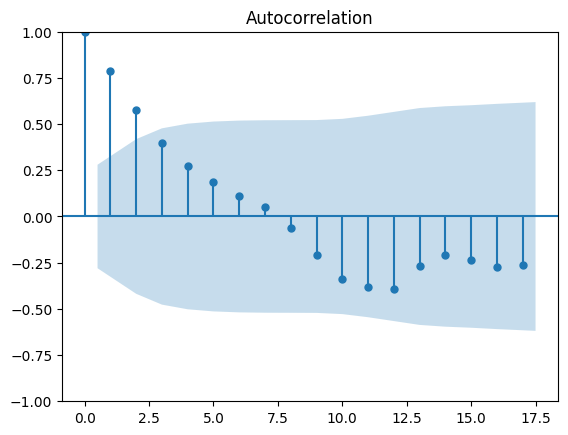

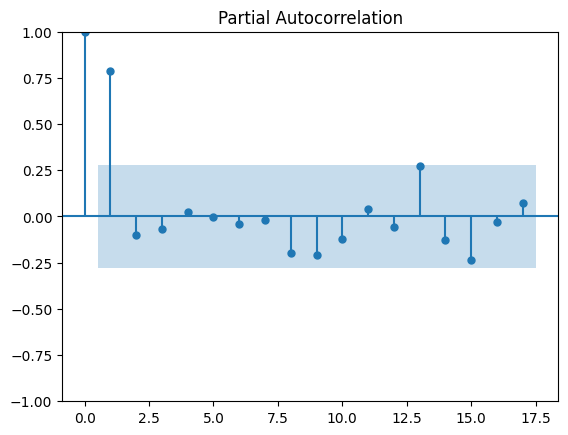

In [12]:
# 自相关和偏自相关系数
plot_acf(series)
plot_pacf(series)
plt.show()

In [13]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(0, 0, 0))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                          ARIMA   Log Likelihood                 -72.513
Date:                Tue, 04 Jun 2024   AIC                            149.026
Time:                        11:06:43   BIC                            152.809
Sample:                             0   HQIC                           150.461
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2157      0.162    625.420      0.000     100.899     101.533
sigma2         1.1296      0.216      5.219      0.000       0.705       1.554
Ljung-Box (L1) (Q):                  32.09   Jarque-

In [14]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(0, 0, 1))  
model_fit = model.fit()
print(model_fit.summary())

E:\360downloads\envs\2021\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(0, 0, 1)   Log Likelihood                 -51.601
Date:                Tue, 04 Jun 2024   AIC                            109.202
Time:                        11:06:44   BIC                            114.877
Sample:                             0   HQIC                           111.355
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2385      0.188    537.750      0.000     100.869     101.607
ma.L1          0.8640      0.118      7.343      0.000       0.633       1.095
sigma2         0.4678      0.075      6.256      0.0

In [15]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(0, 0, 2))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 -42.908
Date:                Tue, 04 Jun 2024   AIC                             93.816
Time:                        11:06:45   BIC                            101.383
Sample:                             0   HQIC                            96.687
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2619      0.224    451.606      0.000     100.822     101.701
ma.L1          1.1571      0.166      6.962      0.000       0.831       1.483
ma.L2          0.5517      0.153      3.601      0.0

In [16]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(0, 0, 3)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(0, 0, 3)   Log Likelihood                 -37.911
Date:                Tue, 04 Jun 2024   AIC                             85.823
Time:                        11:06:46   BIC                             95.282
Sample:                             0   HQIC                            89.411
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.2750      0.263    385.581      0.000     100.760     101.790
ma.L1          1.2565      0.144      8.731      0.000       0.974       1.538
ma.L2          0.9282      0.207      4.476      0.0

In [17]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -33.587
Date:                Tue, 04 Jun 2024   AIC                             73.174
Time:                        11:06:46   BIC                             78.850
Sample:                             0   HQIC                            75.327
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.6296      1.157     87.829      0.000      99.362     103.898
ar.L1          0.9615      0.045     21.390      0.000       0.873       1.050
sigma2         0.2188      0.056      3.937      0.0

In [18]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(1, 0, 1))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -31.879
Date:                Tue, 04 Jun 2024   AIC                             71.758
Time:                        11:06:47   BIC                             79.325
Sample:                             0   HQIC                            74.629
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5561      0.834    121.778      0.000      99.922     103.191
ar.L1          0.9287      0.062     14.894      0.000       0.806       1.051
ma.L1          0.2903      0.186      1.558      0.1

In [19]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(1, 0, 2)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -31.857
Date:                Tue, 04 Jun 2024   AIC                             73.714
Time:                        11:06:48   BIC                             83.173
Sample:                             0   HQIC                            77.303
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5413      0.832    121.992      0.000      99.910     103.173
ar.L1          0.9217      0.083     11.158      0.000       0.760       1.084
ma.L1          0.3021      0.239      1.266      0.2

In [20]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(1, 0, 3))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(1, 0, 3)   Log Likelihood                 -31.796
Date:                Tue, 04 Jun 2024   AIC                             75.591
Time:                        11:06:49   BIC                             86.942
Sample:                             0   HQIC                            79.898
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5250      0.770    131.784      0.000     100.015     103.035
ar.L1          0.9086      0.094      9.648      0.000       0.724       1.093
ma.L1          0.3151      0.243      1.295      0.1

In [21]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(2, 0, 0))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -31.853
Date:                Tue, 04 Jun 2024   AIC                             71.706
Time:                        11:06:50   BIC                             79.273
Sample:                             0   HQIC                            74.577
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5136      0.750    135.316      0.000     100.043     102.984
ar.L1          1.2175      0.178      6.843      0.000       0.869       1.566
ar.L2         -0.2837      0.203     -1.399      0.1

In [22]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(2, 0, 1))  
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -31.842
Date:                Tue, 04 Jun 2024   AIC                             73.684
Time:                        11:06:51   BIC                             83.143
Sample:                             0   HQIC                            77.273
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5278      0.800    126.980      0.000      99.961     103.095
ar.L1          1.1132      0.510      2.185      0.029       0.115       2.112
ar.L2         -0.1824      0.505     -0.361      0.7

In [23]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(2, 0, 2))  #
model_fit = model.fit()
print(model_fit.summary())

E:\360downloads\envs\2021\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\360downloads\envs\2021\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -30.417
Date:                Tue, 04 Jun 2024   AIC                             72.834
Time:                        11:06:54   BIC                             84.185
Sample:                             0   HQIC                            77.141
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.3642      0.324    312.961      0.000     100.729     101.999
ar.L1          1.9002      0.050     38.298      0.000       1.803       1.997
ar.L2         -0.9393      0.041    -23.160      0.0

E:\360downloads\envs\2021\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
order_analyze=st.arma_order_select_ic(data,max_ma=5,ic=['aic','bic'])

E:\360downloads\envs\2021\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
E:\360downloads\envs\2021\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\360downloads\envs\2021\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
E:\360downloads\envs\2021\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
E:\360downloads\envs\2021\Lib\site-packages\statsmodels\base\

In [25]:
order_analyze.aic_min_order

(2, 0)

In [26]:
test_data2=data1['index']

In [27]:
# 选择模型并拟合
# 这里需要根据ACF和PACF图来选择合适的模型参数
model = ARIMA(series, order=(2, 0, 0)) 
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:     居民消费价格指数(上年同月＝100)   No. Observations:                   49
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -31.853
Date:                Tue, 04 Jun 2024   AIC                             71.706
Time:                        11:07:57   BIC                             79.273
Sample:                             0   HQIC                            74.577
                                 - 49                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        101.5136      0.750    135.316      0.000     100.043     102.984
ar.L1          1.2175      0.178      6.843      0.000       0.869       1.566
ar.L2         -0.2837      0.203     -1.399      0.1

In [29]:
pre=model_fit.predict(49,109)
pre_data=pd.Series(pre)
# print(pre_data)
import pandas as pd
import openpyxl
df = pd.DataFrame(pre_data)
print(df)
# 将DataFrame保存为Excel文件
# df.to_excel('put.xlsx', index=False)
# df.to_excel('put.xlsx', engine='openpyxl', index=False)
# df.to_excel('zuoye.xlsx', encoding='utf-16', index=False)
# plt.figure(figsize=(6,4),dpi=200)
# sns.lineplot(x=pre_data.index,y=pre_data.values)
# sns.lineplot(x=test_data2,y=data)# 选择模型并拟合

# 预测未来5年的盈亏情况

# plt.show()

     predicted_mean
49        99.755174
50        99.915719
51       100.067151
52       100.205962
53       100.331994
..              ...
105      101.507605
106      101.508185
107      101.508708
108      101.509181
109      101.509609

[61 rows x 1 columns]


E:\360downloads\envs\2021\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23621 (\N{CJK UNIFIED IDEOGRAPH-5C45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\360downloads\envs\2021\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27665 (\N{CJK UNIFIED IDEOGRAPH-6C11}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\360downloads\envs\2021\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28040 (\N{CJK UNIFIED IDEOGRAPH-6D88}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\360downloads\envs\2021\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36153 (\N{CJK UNIFIED IDEOGRAPH-8D39}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
E:\360downloads\envs\2021\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20215 (\N{CJK UNIFIED IDEOGRAPH-4EF7}) missing from current font.
  fig.canvas.print_figure(b

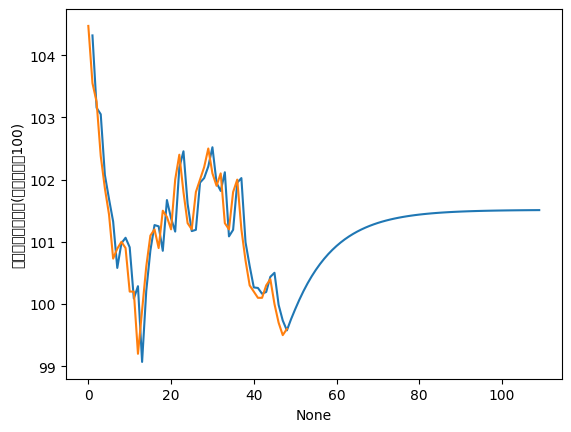

In [30]:
pre=model_fit.predict(1,109)
pre_data=pd.Series(pre)
import pandas as pd
import openpyxl
df = pd.DataFrame(pre_data)
# df.to_excel('xxut.xlsx', engine='openpyxl', index=False)
sns.lineplot(x=pre_data.index,y=pre_data.values)
sns.lineplot(x=test_data2,y=data)# 选择模型并拟合pre=model_fit.predict(31,60)
# 预测未来5年的盈亏情况
plt.show()

In [31]:
pre=model_fit.predict(0,48)
pre_data=pd.Series(pre)
# print(pre_data)
import pandas as pd
import openpyxl
df = pd.DataFrame(pre_data)
# df.to_excel('yuceut.xlsx', engine='openpyxl', index=False)
# plt.figure(figsize=(6,4),dpi=200)
# sns.lineplot(x=pre_data.index,y=pre_data.values)
# sns.lineplot(x=test_data2,y=data)

# # 预测z这四年的盈亏情况

# plt.show()

In [32]:
data

0     104.47
1     103.55
2     103.25
3     102.38
4     101.86
5     101.44
6     100.73
7     100.89
8     101.00
9     100.90
10    100.20
11    100.20
12     99.20
13     99.90
14    100.60
15    101.10
16    101.20
17    100.90
18    101.50
19    101.40
20    101.20
21    102.00
22    102.40
23    101.80
24    101.30
25    101.20
26    101.80
27    102.00
28    102.20
29    102.50
30    102.10
31    101.90
32    102.10
33    101.30
34    101.20
35    101.80
36    102.00
37    101.20
38    100.70
39    100.30
40    100.20
41    100.10
42    100.10
43    100.30
44    100.40
45    100.00
46     99.70
47     99.50
48     99.60
Name: 居民消费价格指数(上年同月＝100), dtype: float64

In [33]:
model_fit.resid

0     2.956394
1    -0.767397
2     0.095962
3    -0.669824
4    -0.215752
5    -0.249512
6    -0.595714
7     0.309518
8     0.023282
9    -0.165243
10   -0.712287
11    0.111562
12   -1.087044
13    0.830415
14    0.394472
15    0.240856
16   -0.069268
17   -0.349153
18    0.644457
19   -0.271135
20   -0.179156
21    0.835964
22    0.205253
23   -0.654753
24   -0.310790
25    0.027707
26    0.607592
27    0.048744
28    0.175486
29    0.288738
30   -0.419755
31   -0.047655
32    0.282348
33   -0.817888
34    0.112823
35    0.607592
36    0.048744
37   -0.824514
38   -0.293803
39   -0.312051
40   -0.066929
41   -0.158672
42   -0.065298
43    0.106330
44   -0.037162
45   -0.502163
46   -0.286808
47   -0.235059
48    0.023316
dtype: float64

In [34]:
import openpyxl
df = pd.DataFrame(model_fit.resid)
df.to_excel('残差.xlsx', engine='openpyxl', index=False)

In [37]:
dataxxx=abs(data-pre_data)

In [38]:
df = pd.DataFrame(dataxxx)

In [39]:
df.to_excel('第一个误差.xlsx', engine='openpyxl', index=False)

In [40]:
dataxxx

0     2.956394
1     0.767397
2     0.095962
3     0.669824
4     0.215752
5     0.249512
6     0.595714
7     0.309518
8     0.023282
9     0.165243
10    0.712287
11    0.111562
12    1.087044
13    0.830415
14    0.394472
15    0.240856
16    0.069268
17    0.349153
18    0.644457
19    0.271135
20    0.179156
21    0.835964
22    0.205253
23    0.654753
24    0.310790
25    0.027707
26    0.607592
27    0.048744
28    0.175486
29    0.288738
30    0.419755
31    0.047655
32    0.282348
33    0.817888
34    0.112823
35    0.607592
36    0.048744
37    0.824514
38    0.293803
39    0.312051
40    0.066929
41    0.158672
42    0.065298
43    0.106330
44    0.037162
45    0.502163
46    0.286808
47    0.235059
48    0.023316
dtype: float64

In [41]:
dataxx=abs((data-pre_data)/data)

In [42]:
df = pd.DataFrame(dataxx)
df.to_excel('相对误差.xlsx', engine='openpyxl', index=False)

In [43]:
dataxx

0     0.028299
1     0.007411
2     0.000929
3     0.006543
4     0.002118
5     0.002460
6     0.005914
7     0.003068
8     0.000231
9     0.001638
10    0.007109
11    0.001113
12    0.010958
13    0.008312
14    0.003921
15    0.002382
16    0.000684
17    0.003460
18    0.006349
19    0.002674
20    0.001770
21    0.008196
22    0.002004
23    0.006432
24    0.003068
25    0.000274
26    0.005968
27    0.000478
28    0.001717
29    0.002817
30    0.004111
31    0.000468
32    0.002765
33    0.008074
34    0.001115
35    0.005968
36    0.000478
37    0.008147
38    0.002918
39    0.003111
40    0.000668
41    0.001585
42    0.000652
43    0.001060
44    0.000370
45    0.005022
46    0.002877
47    0.002362
48    0.000234
dtype: float64

In [84]:
data444=pre_data.sum()

In [85]:
data444

4960.957227665972

In [86]:
data222=data.sum()

In [87]:
data222

4959.570000000001

In [88]:
abs(data222-data444)

1.3872276659712952

In [89]:
abs((data222-data444)/data222)

0.0002797072459852961